***Stock Market Price Prediction*** 
dataset: apple shares.
Model: LSTMs

Objective: aim is to predict stock prices using LSTM model.

In [18]:
!pip install alpha_vantage



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
api_key = "your-API-key-here"
ts = TimeSeries(key=api_key, output_format='pandas')


In [38]:
# Fetch stock data 
symbol = 'AAPL'
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

In [39]:
# Save to CSV
data.to_csv(f"{symbol}_stock_data.csv")

<!-- Data Exploration -->

In [40]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-04-03,205.540,207.49,201.25,203.19,103419006.0
2025-04-02,221.315,225.19,221.02,223.89,35905904.0
2025-04-01,219.805,223.68,218.90,223.19,36412740.0
2025-03-31,217.005,225.62,216.23,222.13,65299321.0
2025-03-28,221.670,223.81,217.68,217.90,39818617.0


In [41]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-05,84.62,88.37,84.00,88.31,3721500.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-01,80.00,80.69,77.37,77.62,2487300.0


In [42]:
data.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [43]:
data.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [44]:
print(data.index.dtype)

datetime64[ns]


<!-- data.columnsIndex(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object') -->

In [47]:

# Rename the columns for simplicity
data.columns = ['open', 'high', 'low', 'close', 'volume']


In [48]:
data.head()

,open,high,low,close,volume
date,,,,,
2025-04-03,205.540,207.49,201.25,203.19,103419006.0
2025-04-02,221.315,225.19,221.02,223.89,35905904.0
2025-04-01,219.805,223.68,218.90,223.19,36412740.0
2025-03-31,217.005,225.62,216.23,222.13,65299321.0
2025-03-28,221.670,223.81,217.68,217.90,39818617.0


#Visualization

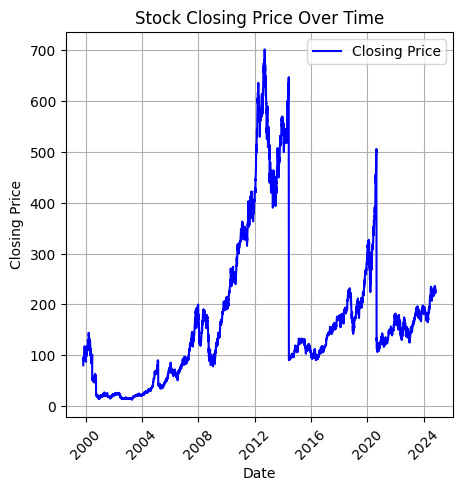

In [104]:
# Plot the closing price
plt.figure(figsize=(5, 5))
plt.plot(data.index, data['close'], label='Closing Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [46]:
data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

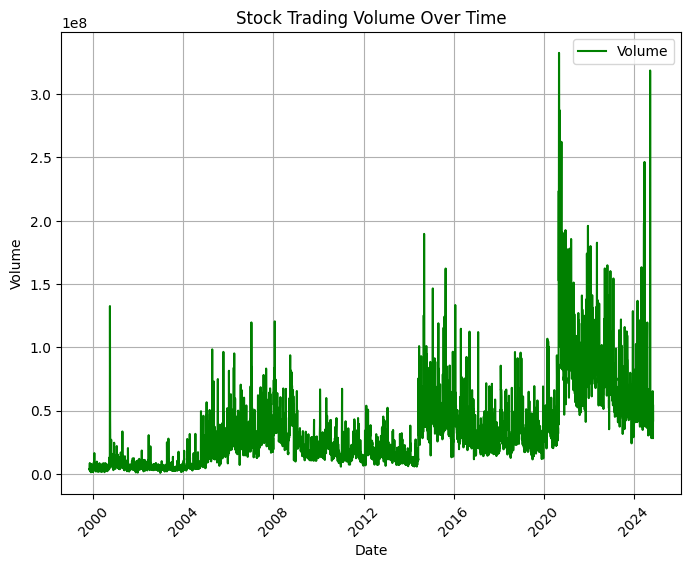

In [98]:
# Plot the trading volume
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['volume'], label='Volume', color='green')
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


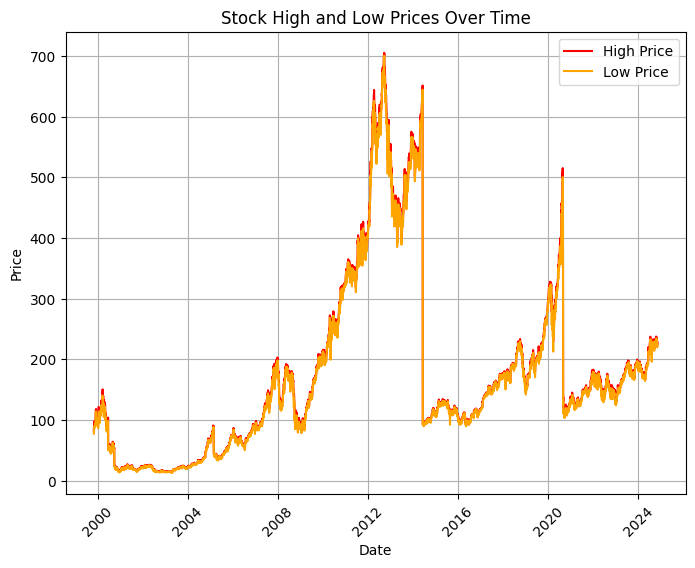

In [97]:
# Plot the high and low prices
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['high'], label='High Price', color='red')
plt.plot(data.index, data['low'], label='Low Price', color='orange')
plt.title('Stock High and Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


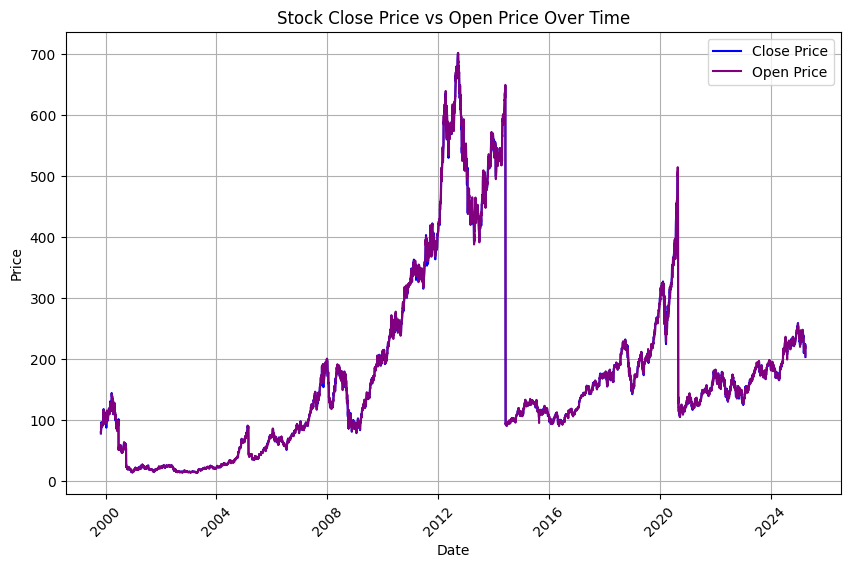

In [54]:
# Plot the close and open prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['close'], label='Close Price', color='blue')
plt.plot(data.index, data['open'], label='Open Price', color='purple')
plt.title('Stock Close Price vs Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Moving averages help to smooth out the volatility in stock prices and identify trends. You can calculate the moving averages for different time windows.
EMA gives more weight to recent prices, which is useful for capturing recent trends.
ROC measures the percentage change in price over a certain period.

In [56]:
# Calculate features
data['SMA_30'] = data['close'].rolling(window=30).mean()
data['SMA_100'] = data['close'].rolling(window=100).mean()
data['EMA_30'] = data['close'].ewm(span=30, adjust=False).mean()
data['ROC_10'] = data['close'].pct_change(periods=10)

RSI is used to measure the magnitude of recent price changes to evaluate overbought or oversold conditions.

In [57]:

# Calculate RSI
delta = data['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI_14'] = 100 - (100 / (1 + rs))

Bollinger Bands provide a range of values (upper and lower bands) within which the price tends to stay.

In [58]:
# Calculate Bollinger Bands
data['BB_upper'] = data['SMA_30'] + 2 * data['close'].rolling(window=30).std()
data['BB_lower'] = data['SMA_30'] - 2 * data['close'].rolling(window=30).std()


 lag features to capture past data points.

In [59]:
# Create lag features
data['lag_1'] = data['close'].shift(1)

 calculate the standard deviation of the closing price over a rolling window to understand the volatility of the stock.

In [60]:
# Calculate volatility
data['volatility'] = data['close'].rolling(window=30).std()

In [61]:
# Create target variable (next day's close)
data['target'] = data['close'].shift(-1)

In [62]:
data.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
SMA_30        29
SMA_100       99
EMA_30         0
ROC_10        10
RSI_14        13
BB_upper      29
BB_lower      29
lag_1          1
volatility    29
target         1
dtype: int64

In [63]:
# Drop rows with missing values created by rolling windows
data.dropna(inplace=True)

In [67]:
# Display the new features
data.head()

,open,high,low,close,volume,SMA_30,SMA_100,EMA_30,ROC_10,RSI_14,BB_upper,BB_lower,lag_1,volatility,target
date,,,,,,,,,,,,,,,
2024-11-07,224.625,227.875,224.57,227.48,42137691.0,237.190333,234.5143,233.725663,-0.004551,32.762610,256.460481,217.920186,226.96,9.635074,222.72
2024-11-06,222.610,226.065,221.19,222.72,54561121.0,236.288000,234.7096,233.015620,-0.027424,26.486280,255.651732,216.924268,227.48,9.681866,223.45
2024-11-05,221.795,223.950,221.14,223.45,28111338.0,235.468000,234.7052,232.398483,-0.021158,30.992736,254.854149,216.081851,222.72,9.693074,222.01
2024-11-04,220.990,222.790,219.71,222.01,44944468.0,234.419000,234.6934,231.728258,-0.026357,33.074935,253.167384,215.670616,223.45,9.374192,222.91
2024-11-01,220.965,225.350,220.27,222.91,65276741.0,233.481333,234.7012,231.159339,-0.009289,37.681159,251.592909,215.369758,222.01,9.055788,225.91


In [71]:
from sklearn.preprocessing import StandardScaler

In [76]:
# Normalization

In [72]:
# Apply StandardScaler to the selected columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['close', 'SMA_30', 'SMA_100', 'EMA_30', 'ROC_10', 'RSI_14', 'BB_upper', 'BB_lower', 'lag_1', 'volatility']])


In [73]:
# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(data_scaled, columns=['close', 'SMA_30', 'SMA_100', 'EMA_30', 'ROC_10', 'RSI_14', 'BB_upper', 'BB_lower', 'lag_1', 'volatility'])


In [74]:
# Add the target variable to the scaled DataFrame
scaled_df['target'] = data['target'].values

In [75]:
# Display the scaled data
scaled_df.head()

,close,SMA_30,SMA_100,EMA_30,ROC_10,RSI_14,BB_upper,BB_lower,lag_1,volatility,target
0,0.361484,0.429680,0.414366,0.407587,-0.057146,-0.698357,0.393185,0.446368,0.357794,0.041806,222.72
1,0.329087,0.423476,0.415736,0.402684,-0.137550,-1.049634,0.388223,0.439070,0.361334,0.044275,223.45
2,0.334055,0.417838,0.415705,0.398423,-0.115526,-0.797414,0.383329,0.432897,0.328935,0.044866,222.01
3,0.324254,0.410626,0.415622,0.393796,-0.133802,-0.680876,0.372980,0.429883,0.333904,0.028040,222.91
4,0.330380,0.404180,0.415677,0.389868,-0.073801,-0.423072,0.363319,0.427678,0.324103,0.011238,225.91


Model: LSTM

In [78]:
import numpy as np

In [79]:
# Function to create sequences of data for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Use the past 60 days to predict the next day's price
        y.append(data[i, 0])  # The target is the price of the next day
    return np.array(X), np.array(y)

In [80]:
# Create sequences from the 'close' prices
data_close = data['close'].values.reshape(-1, 1)  # Reshape for LSTM input
X, y = create_sequences(data_close, time_step=60)


In [81]:
# Reshape X to be in the shape (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [82]:
# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [83]:

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(4988, 60, 1), y_train=(4988,)
Testing data shape: X_test=(1247, 60, 1), y_test=(1247,)


 Build the LSTM Model:

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [85]:
# Build the LSTM model
model = Sequential()
# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Mark M\Desktop\td-n\td\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 61545.5781
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 59360.0117
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 53676.7188
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 50940.6172
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 47672.7031
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 45944.5898
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 44985.1875
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 40208.1836
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 39964.7305
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 38926.6289


In [88]:
# Predicting on the test set
y_pred = model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [93]:

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2899.6652108133308
Root Mean Squared Error: 53.848539542064934


In [96]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -2.212308872918856


In [99]:
# Save the model
model.save('stock_prediction_lstm_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [103]:
# Save the weights
model.save_weights('stock_prediction_lstm_weights.weights.h5')
print("Weights saved successfully!")


Weights saved successfully!
